In [1]:
import os
# from os import chdir
import pandas as pd
import numpy as np
from PIL import Image
import cv2
from sklearn.preprocessing import LabelEncoder
import random

In [2]:
from skimage.io import imread, imshow
from skimage import filters
from skimage import feature
from sklearn.metrics import f1_score
from sklearn.preprocessing import MultiLabelBinarizer

In [3]:
import torch

from torch import Tensor                  
import torch.nn as nn                     # neural networks

from torchviz import make_dot, make_dot_from_trace

In [4]:
dataset1 = pd.read_csv(r"C:\Users\abdul\Desktop\AI project\archive\memotion_dataset_7k\reference.csv")

In [5]:
dataset1

,Unnamed: 0,original_name,image_url,image_name
0,0,10_year_2r94rv.jpg,https://i.imgflip.com/2r94rv.jpg,image_1.jpg
1,1,10_year_10-year-challenge_1547788782.jpeg,https://spiderimg.amarujala.com/assets/images/...,image_2.jpeg
2,2,10_year_10yearchallenge-5c75f8b946e0fb0001edc7...,https://www.lifewire.com/thmb/8wNfd94_meE9X2cp...,image_3.JPG
3,3,10_year_10-year-challenge-sweet-dee-edition-40...,https://pics.conservativememes.com/10-year-cha...,image_4.png
4,4,10_year_10-year-challenge-with-no-filter-47-hi...,https://pics.me.me/10-year-challenge-with-no-f...,image_5.png
...,...,...,...,...
6987,6987,best_2017_d2fe668a7ff9227fbb604927de025311.jpg,https://i.pinimg.com/345x/d2/fe/66/d2fe668a7ff...,image_6988.jpg
6988,6988,best_2017_DR9DnutV4AYK-Pc.jpg,https://pbs.twimg.com/media/DR9DnutV4AYK-Pc.jpg,image_6989.jpg
6989,6989,best_2017_less-more-talking-listening-planning...,https://pics.ballmemes.com/less-more-talking-l...,image_6990.png
6990,6990,best_2017_make-time.jpg,https://arhtisticlicense.files.wordpress.com/2...,image_6991.jpg


In [6]:
dataset2 = pd.read_csv(r"C:\Users\abdul\Desktop\AI project\archive\memotion_dataset_7k\\labels.csv")

In [7]:
dataset2

,Unnamed: 0,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
0,0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,hilarious,general,not_offensive,not_motivational,very_positive
1,1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,not_funny,general,not_offensive,motivational,very_positive
2,2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,very_funny,not_sarcastic,not_offensive,not_motivational,positive
3,3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,very_funny,twisted_meaning,very_offensive,motivational,positive
4,4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,hilarious,very_twisted,very_offensive,not_motivational,neutral
...,...,...,...,...,...,...,...,...,...
6987,6987,image_6988.jpg,Tuesday is Mardi Gras Wednesday is Valentine's...,Tuesday is Mardi Gras Wednesday is Valentine's...,very_funny,twisted_meaning,very_offensive,motivational,neutral
6988,6988,image_6989.jpg,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,funny,twisted_meaning,not_offensive,not_motivational,neutral
6989,6989,image_6990.png,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,funny,general,slight,not_motivational,positive
6990,6990,image_6991.jpg,When I VERY have time is a fantasy No one has ...,When I have time is a fantasy. no one has time...,not_funny,twisted_meaning,not_offensive,motivational,very_positive


In [8]:
list1 = dataset2.image_name.to_list()

In [9]:
path_to_folder = r"C:\Users\abdul\Desktop\AI project\archive\memotion_dataset_7k\images"

In [10]:
list1 = os.listdir(path_to_folder)
save_path = r"C:\Users\abdul\Desktop\AI project\archive\memotion_dataset_7k\canny_images"

In [25]:
for i in range(len(list1)):

    try:
        imgpath = path_to_folder + "/" + list1[i]
        img = Image.open(imgpath)
        if img.mode != 'RGB':
            img = img.convert('RGB')
        
        img2 = img.resize((250,250))
        new_name = save_path + "/" + list1[i]        
        img2.save(new_name)
        
        img3 = cv2.imread(new_name)
        canny = cv2.Canny(img3,100,100)
        cv2.imwrite(new_name,canny)
    
    except:        
        print('Truncated image')
        print(imgpath)
        
#     except:
#         chdir(path_to_folder)
#         os.remove(imgpath)
#         continue

Truncated image
C:\Users\abdul\Desktop\AI project\archive\memotion_dataset_7k\images/image_5119.png


C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [11]:
img_set = []
labels = []
text_imgs = []

class_overall_sentiment = []
class_humour = []
class_sarcasm = []
class_offensive = []
class_motivational = []


sentiments = dataset2.overall_sentiment.to_list()
humours = dataset2.humour.to_list()
sarcasms = dataset2.sarcasm.to_list()
offensives = dataset2.offensive.to_list()
motives = dataset2.motivational.to_list()

org_text = dataset2.text_corrected.to_list()
le = LabelEncoder()

for i in range(len(list1)):

    imgpath = save_path + "/" + list1[i]
    img2 = cv2.imread(imgpath)
    img_set.append(np.array(img2).astype('float64'))
    labels.append(list1[i])
    text_imgs.append(org_text[i])
    class_overall_sentiment.append(sentiments[i])
    class_humour.append(humours[i])
    class_sarcasm.append(sarcasms[i])
    class_offensive.append(offensives[i])
    class_motivational.append(motives[i])


for i in range(len(class_overall_sentiment)):
    
    if class_overall_sentiment[i] == 'very_positive':
        class_overall_sentiment[i] = 'positive'

    elif class_overall_sentiment[i] == 'very_negative':
        class_overall_sentiment[i] = 'negative'
        

for i in range(len(class_humour)):
    
    if class_humour[i] != 'not_funny':
        class_humour[i] = 'funny'


for i in range(len(class_sarcasm)):
    
    if class_sarcasm[i] == 'general':
        class_sarcasm[i] = 'not_sarcastic'
        
    elif class_sarcasm[i] == 'twisted_meaning' or class_sarcasm[i] == 'very_twisted':
        class_sarcasm[i] = 'sarcastic'
        
for i in range(len(class_offensive)):
    
    if class_offensive[i] != 'not_offensive':
        class_offensive[i] = 'offensive'
        
        
class_overall_sentiment = le.fit_transform(class_overall_sentiment)
class_humour = le.fit_transform(class_humour)
class_sarcasm = le.fit_transform(class_sarcasm)
class_offensive = le.fit_transform(class_offensive)
class_motivational = le.fit_transform(class_motivational)

### Text Vectorization

In [12]:
#getting the glove 6b file read

embeddings_index = {}
file = open('glove.6B.100d.txt', encoding='utf-8')
for line in file:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float64')
    embeddings_index[word] = coefs
file.close()

In [13]:
def Convert(string):
    li = list(string.split(" "))
    return li


def get_text_vector(final_list_cmnts,embeddings_index):
    
    vectors= []
    for i in final_list_cmnts:

        temp_list = []

        try:
            list_of_words = Convert(i.lower())
            for k in list_of_words:
                try:
                    temp = embeddings_index[k]
                    temp_list.append(temp)
                    
#                     tt  = np.array(tt)
#                     tt = np.resize(tt,20)
                except:
                    1 == 1
            #vectors.append(temp_list)
#             vectors.append(np.resize(np.array(temp_list),20))
        except:
            #temp_list.append(np.random.random(size = 100))
            1==1
        mean_list = []
        mean_list = [random.randrange(0, 1, 1) for i in range(100)]

        for i in temp_list:
            mean_list  = mean_list + i
            
        mean_list = [x / 100 for x in mean_list]
        temp_list = mean_list
        
        vectors.append(np.array(temp_list))
#         vectors.append(np.resize(np.array(temp_list),20))

    return np.array(vectors)

In [14]:
list_comnts = text_imgs
list_img_names = labels
final_list_cmnts = []

for i in range(len(labels)):
    
    ind = list_img_names.index(labels[i])
    
    final_list_cmnts.append(list_comnts[ind])
    
Vector_text = get_text_vector(final_list_cmnts, embeddings_index)
        

In [15]:
def create_training_data():
    Training_data =[]
    
    for i,j,k,a,b,c,d in zip(Vector_text,img_set,class_overall_sentiment,class_humour,class_sarcasm,class_motivational,class_offensive):
        Training_data.append([i,j,k,a,b,c,d])

    return Training_data

In [16]:
train_data= create_training_data()

In [17]:
indexes = []
for i,j in zip(range(len(train_data)),(train_data)):
    
    if (j[1].shape) == ():
        indexes.append(i)
        
train_data = np.delete(train_data,indexes,axis = 0)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [18]:
train_data = train_data.tolist()
test_dataset = train_data[len(train_data) - 700:]
train_dataset = train_data[:len(train_data)-700]

# img_set = []
# Vector_text = []
# class_overall_sentiment,class_humour,class_sarcasm,class_motivational,class_offensive = [],[],[],[],[]

In [19]:
len(train_data)

6991

# Neural Network Model

In [20]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=8, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=8, 
                                           shuffle=True)

In [21]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        
        self.Text_layers = nn.Sequential(
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 200),
            nn.ReLU(),
            nn.Linear(200,100)
        )
        
        self.Image_layers = nn.Sequential(
            nn.Linear(250*250*3,500),
            nn.ReLU(),
            nn.Linear(500,400),
            nn.ReLU(),
            nn.Linear(400,100)
        )
        
        self.CombinedLayers = nn.Sequential(
            nn.Linear(200,100),
            nn.ReLU(),
            nn.Linear(100,100),
            nn.ReLU(),
            nn.Linear(100,100),
            nn.ReLU(),
            nn.Linear(100,50)
        )
        
        self.HumourResult = nn.Sequential(
            nn.Linear(50,25),
            nn.ReLU(),
            nn.Linear(25,10),
            nn.ReLU(),
            nn.Linear(10,2)
        )
        
        self.SentimentResult = nn.Sequential(
            nn.Linear(50,25),
            nn.ReLU(),
            nn.Linear(25,10),
            nn.ReLU(),
            nn.Linear(10,3)
        )
        
        self.OffenseResult = nn.Sequential(
            nn.Linear(50,25),
            nn.ReLU(),
            nn.Linear(25,10),
            nn.ReLU(),
            nn.Linear(10,2)
        )
        
        self.sarcasmResult = nn.Sequential(
            nn.Linear(50,25),
            nn.ReLU(),
            nn.Linear(25,10),
            nn.ReLU(),
            nn.Linear(10,2)
        )
        
        self.MotiveResult = nn.Sequential(
            nn.Linear(50,25),
            nn.ReLU(),
            nn.Linear(25,10),
            nn.ReLU(),
            nn.Linear(10,2)
        )
        
    def forward(self,Image,Text):
        flat = self.flatten(Image)
        Out_Text = self.Text_layers(Text)
        Out_Img = self.Image_layers(flat)
        concat_res = torch.cat([Out_Img,Out_Text],1)
        Result = self.CombinedLayers(concat_res)
        
        out_hum = self.HumourResult(Result)
        out_sarc = self.sarcasmResult(Result)
        out_motiv = self.MotiveResult(Result)
        out_off = self.OffenseResult(Result)
        out_sent = self.SentimentResult(Result)
        
        return out_hum, out_sarc, out_motiv, out_off, out_sent

In [22]:
model = NeuralNetwork()

In [23]:
# Hyper-parameters 
num_epochs = 1
learning_rate = 0.00001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

In [24]:
#Training MODEL

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    
        for i, (text, image, sent, hum, sarc, motiv, off) in enumerate(train_loader):


                optimizer.zero_grad()

                outhum,outsarc,outmotiv,outoff,outsent = model(image.float().unsqueeze(-1),text.float())

                loss1 = criterion(outsent,sent)
                #loss1.backward()
                loss2 = criterion(outsarc,sarc)
                #loss2.backward()
                loss3 = criterion(outhum,hum)
                #loss3.backward()
                loss4 = criterion(outmotiv,motiv)
                #loss4.backward()
                loss5 = criterion(outoff,off)
                #loss5.backward()
                
                loss = loss1+loss2+loss3+loss4+loss5
                loss.backward()
                optimizer.step()

                if (i+1) % 100 == 0:
                    print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/1], Loss: 4.3289
Epoch [1/1], Loss: 3.5287
Epoch [1/1], Loss: 3.4781
Epoch [1/1], Loss: 3.4900
Epoch [1/1], Loss: 3.3022
Epoch [1/1], Loss: 3.9192
Epoch [1/1], Loss: 3.0635


In [25]:
#testing the model
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_wrong = 0
    
    n_actual = []
    n_predicted = []

    
    for i, (text, image, sent, hum, sarc, motiv, off) in enumerate(test_loader):
        
#         try:
            outhum,outsarc,outmotiv,outoff,outsent = model(image.float().unsqueeze(-1),text.float())
            _, predicted = torch.max(outhum.data, 1)
            n_samples += hum.size(0)
            n_correct += (predicted == hum).sum().item()
            n_actual.append(hum.tolist())
            n_predicted.append(predicted.tolist())
            
            _, predicted = torch.max(outsarc.data, 1)
            n_samples += sarc.size(0)
            n_correct += (predicted == sarc).sum().item()
            n_actual.append(sarc.tolist())
            n_predicted.append(predicted.tolist())
            
            _, predicted = torch.max(outmotiv.data, 1)
            n_samples += motiv.size(0)
            n_correct += (predicted == motiv).sum().item()
            n_actual.append(motiv.tolist())
            n_predicted.append(predicted.tolist())
            
            _, predicted = torch.max(outoff.data, 1)
            n_samples += off.size(0)
            n_correct += (predicted == off).sum().item()
            n_actual.append(off.tolist())
            n_predicted.append(predicted.tolist())
            
            _, predicted = torch.max(outsent.data, 1)
            n_samples += sent.size(0)
            n_correct += (predicted == sent).sum().item()
            n_actual.append(sent.tolist())
            n_predicted.append(predicted.tolist())
            
            

#         except:
#             print('error')
            
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network is : {acc} %')

Accuracy of the network is : 67.22857142857143 %


In [26]:
n_actual = MultiLabelBinarizer().fit_transform(n_actual)
n_predicted = MultiLabelBinarizer().fit_transform(n_predicted)

In [32]:
f1_score(n_actual,n_predicted, average = 'micro')

0.6587005227781927

In [29]:
from torchviz import make_dot
xx = torch.tensor(img_set[0])
yy = torch.tensor(Vector_text[0])

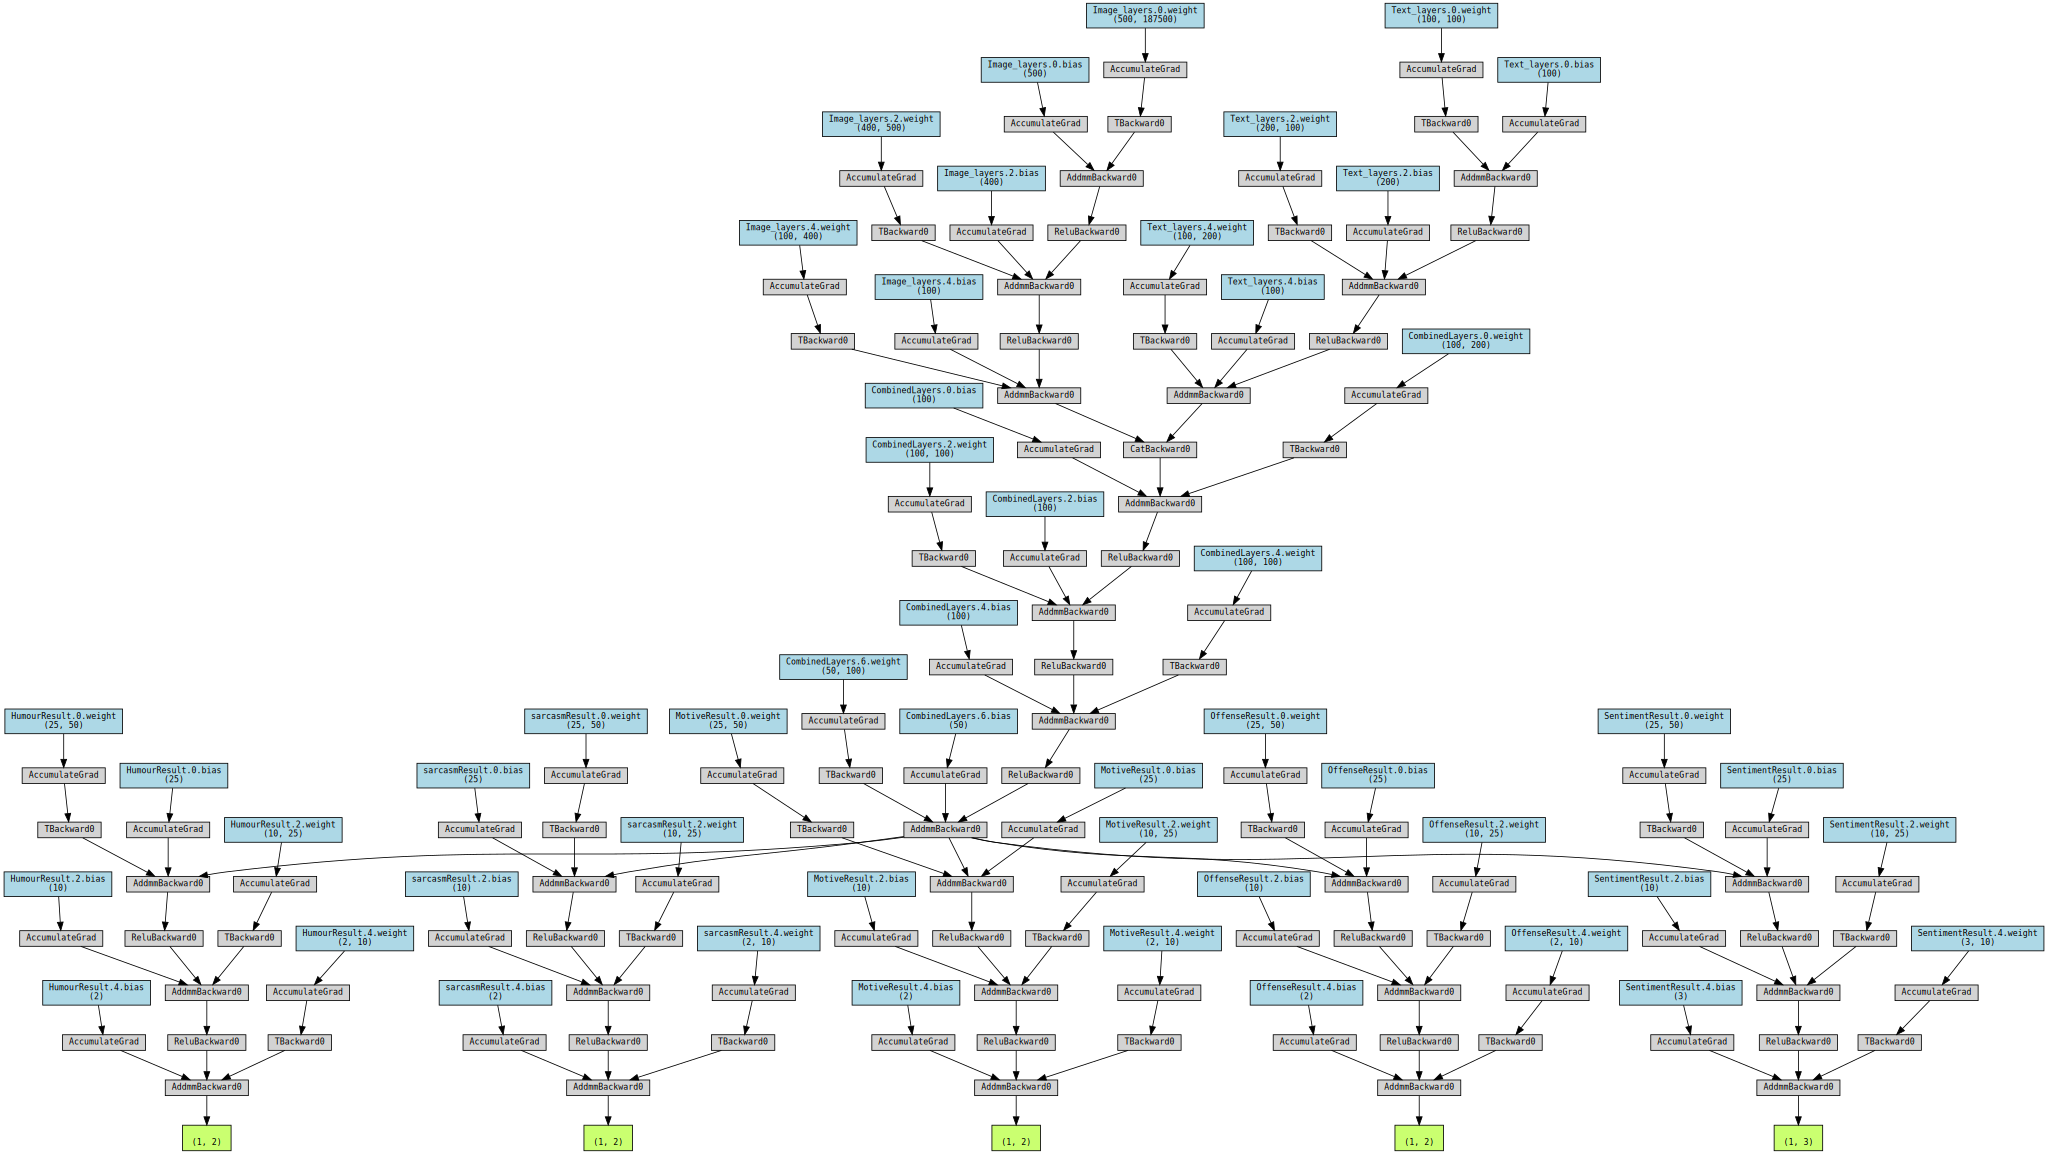

In [30]:
make_dot(model(xx.float().unsqueeze(0),yy.float().unsqueeze(0)), params=dict((model.named_parameters())))

In [ ]:
#             outhum,outsarc,outmotiv,outoff,outsent = model(image.float().unsqueeze(-1),text.float())
#             _, predicted = torch.max(outhum.data, 1)
#             n_samples += hum.size(0)
#             n_correct += (predicted == hum).sum().item()
#             n_wrong += (predicted!=hum).sum().item()
# #             n_actual.append(hum.tolist())
# #             n_predicted.append(predicted.tolist())
            
#             _, predicted = torch.max(outsarc.data, 1)
#             n_samples += sarc.size(0)
#             n_correct += (predicted == sarc).sum().item()
#             n_wrong += (predicted!=hum).sum().item()
            
#             _, predicted = torch.max(outmotiv.data, 1)
#             n_samples += motiv.size(0)
#             n_correct += (predicted == motiv).sum().item()
#             n_wrong += (predicted!=hum).sum().item()
            
#             _, predicted = torch.max(outoff.data, 1)
#             n_samples += off.size(0)
#             n_correct += (predicted == off).sum().item()
#             n_wrong += (predicted!=hum).sum().item()
            
#             _, predicted = torch.max(outsent.data, 1)
#             n_samples += sent.size(0)
#             n_correct += (predicted == sent).sum().item()
#             n_wrong += (predicted!=hum).sum().item()

In [ ]:
#             outhum,outsarc,outmotiv,outoff,outsent = model(image.float().unsqueeze(-1),text.float())
#             _, predicted = torch.max(outhum.data, 1)
#             n_samples += hum.size(0)
#             n_correct += (predicted == hum).sum().item()
#             n_actual.append(hum.tolist())
#             n_predicted.append(predicted.tolist())
            
#             _, predicted = torch.max(outsarc.data, 1)
#             n_samples += sarc.size(0)
#             n_correct += (predicted == sarc).sum().item()
#             n_actual.append(sarc.tolist())
#             n_predicted.append(predicted.tolist())
            
#             _, predicted = torch.max(outmotiv.data, 1)
#             n_samples += motiv.size(0)
#             n_correct += (predicted == motiv).sum().item()
#             n_actual.append(motiv)
#             n_predicted.append(predicted.tolist())
            
#             _, predicted = torch.max(outoff.data, 1)
#             n_samples += off.size(0)
#             n_correct += (predicted == off).sum().item()
#             n_actual.append(off)
#             n_predicted.append(predicted.tolist())
            
#             _, predicted = torch.max(outsent.data, 1)
#             n_samples += sent.size(0)
#             n_correct += (predicted == sent).sum().item()
#             n_actual.append(sent)
#             n_predicted.append(predicted.tolist())